In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [2]:
import os
import tarfile
import urllib.request

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [3]:
fetch_housing_data()

/tmp/ipython-input-1387014147.py:15: DeprecationWarning: Python 3.14 will, by default, filter extracted tar archives and reject files or modify their metadata. Use the filter argument to control this behavior.
  housing_tgz.extractall(path=housing_path)


##Load the Data

In [4]:
import pandas as pd
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

housing_df = load_housing_data()

In [5]:
housing_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


## Describe Data

In [6]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


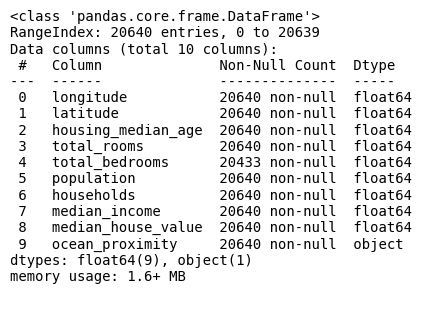

In [ ]:
### Export info to an eps diagram.

import io
def export_info_to_eps_diag(df):


  buffer = io.StringIO()
  df.info(buf=buffer)
  info_str = buffer.getvalue()

# Create a figure
  fig, ax = plt.subplots(figsize=(5, 3))
  ax.axis("off")  # hide axes

  # Add the text to the figure
  ax.text(0, 1, info_str, fontsize=10, family="monospace", va="top")

  plt.savefig("df_info.eps", format="eps", dpi=300, bbox_inches="tight")

export_info_to_eps_diag(housing_df)

<Axes: >

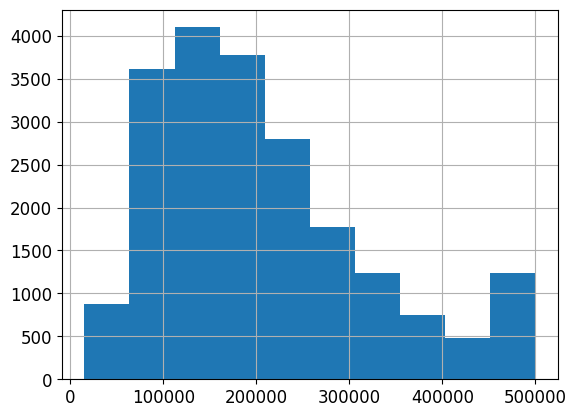

In [ ]:
housing_df['median_house_value'].hist()

In [ ]:
housing_df.shape

(20640, 10)

In [ ]:
housing_df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [ ]:
housing_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [ ]:
housing_df.isnull()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
20635,False,False,False,False,False,False,False,False,False,False
20636,False,False,False,False,False,False,False,False,False,False
20637,False,False,False,False,False,False,False,False,False,False
20638,False,False,False,False,False,False,False,False,False,False


## Histrogram Plots

<Axes: >

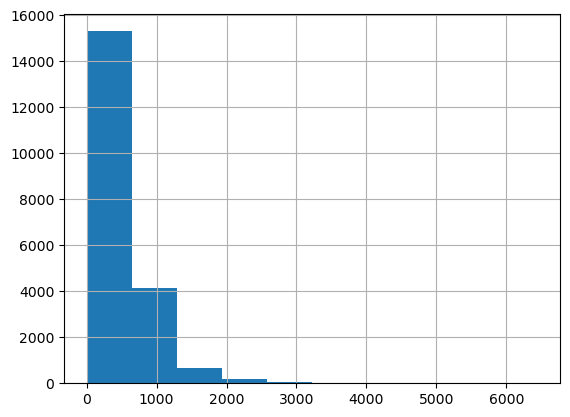

In [ ]:
housing_df["total_bedrooms"].hist()

In [ ]:
housing_df['total_bedrooms'].mean()

np.float64(537.8705525375618)

In [ ]:
housing_df['total_bedrooms'].unique()

array([ 129., 1106.,  190., ..., 3008., 1857., 1052.])

In [ ]:
housing_nulls = housing_df[housing_df.isnull().any(axis=1)]
housing_nulls

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0,NEAR BAY
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0,NEAR BAY
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0,NEAR BAY
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,247100.0,NEAR BAY
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,178400.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20267,-119.19,34.20,18.0,3620.0,NaN,3171.0,779.0,3.3409,220500.0,NEAR OCEAN
20268,-119.18,34.19,19.0,2393.0,NaN,1938.0,762.0,1.6953,167400.0,NEAR OCEAN
20372,-118.88,34.17,15.0,4260.0,NaN,1701.0,669.0,5.1033,410700.0,<1H OCEAN
20460,-118.75,34.29,17.0,5512.0,NaN,2734.0,814.0,6.6073,258100.0,<1H OCEAN


## Experimenting with handling missing data

In [ ]:
housing_nulls.dropna(subset=['total_bedrooms']) #Removing based on the rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity


In [ ]:
housing_nulls.drop('total_bedrooms', axis=1)

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47.0,1256.0,570.0,218.0,4.3750,161900.0,NEAR BAY
341,-122.17,37.75,38.0,992.0,732.0,259.0,1.6196,85100.0,NEAR BAY
538,-122.28,37.78,29.0,5154.0,3741.0,1273.0,2.5762,173400.0,NEAR BAY
563,-122.24,37.75,45.0,891.0,384.0,146.0,4.9489,247100.0,NEAR BAY
696,-122.10,37.69,41.0,746.0,387.0,161.0,3.9063,178400.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...
20267,-119.19,34.20,18.0,3620.0,3171.0,779.0,3.3409,220500.0,NEAR OCEAN
20268,-119.18,34.19,19.0,2393.0,1938.0,762.0,1.6953,167400.0,NEAR OCEAN
20372,-118.88,34.17,15.0,4260.0,1701.0,669.0,5.1033,410700.0,<1H OCEAN
20460,-118.75,34.29,17.0,5512.0,2734.0,814.0,6.6073,258100.0,<1H OCEAN


In [7]:
median = housing_df['total_bedrooms'].median()
housing_nulls.fillna(median , inplace=True)

NameError: name 'housing_nulls' is not defined

In [ ]:
housing_nulls

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47.0,1256.0,435.0,570.0,218.0,4.3750,161900.0,NEAR BAY
341,-122.17,37.75,38.0,992.0,435.0,732.0,259.0,1.6196,85100.0,NEAR BAY
538,-122.28,37.78,29.0,5154.0,435.0,3741.0,1273.0,2.5762,173400.0,NEAR BAY
563,-122.24,37.75,45.0,891.0,435.0,384.0,146.0,4.9489,247100.0,NEAR BAY
696,-122.10,37.69,41.0,746.0,435.0,387.0,161.0,3.9063,178400.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20267,-119.19,34.20,18.0,3620.0,435.0,3171.0,779.0,3.3409,220500.0,NEAR OCEAN
20268,-119.18,34.19,19.0,2393.0,435.0,1938.0,762.0,1.6953,167400.0,NEAR OCEAN
20372,-118.88,34.17,15.0,4260.0,435.0,1701.0,669.0,5.1033,410700.0,<1H OCEAN
20460,-118.75,34.29,17.0,5512.0,435.0,2734.0,814.0,6.6073,258100.0,<1H OCEAN


##Handling the Categorical Data

In [ ]:
housing_df['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [ ]:
housing_cat = housing_df[['ocean_proximity']]
housing_cat

,ocean_proximity
0,NEAR BAY
1,NEAR BAY
2,NEAR BAY
3,NEAR BAY
4,NEAR BAY
...,...
20635,INLAND
20636,INLAND
20637,INLAND
20638,INLAND


In [8]:

from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

NameError: name 'housing_cat' is not defined

In [ ]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [ ]:
housing_cat_1hot.toarray()

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

<Axes: >

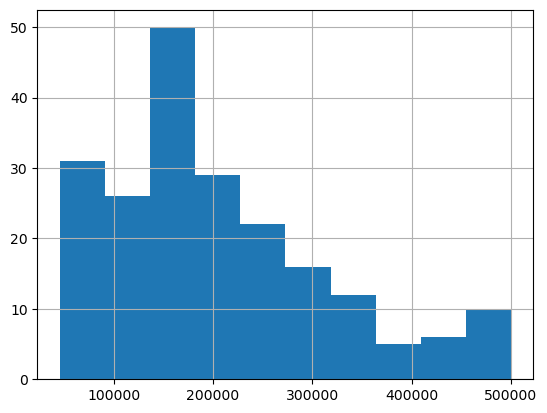

In [ ]:
housing_nulls['median_house_value'].hist()

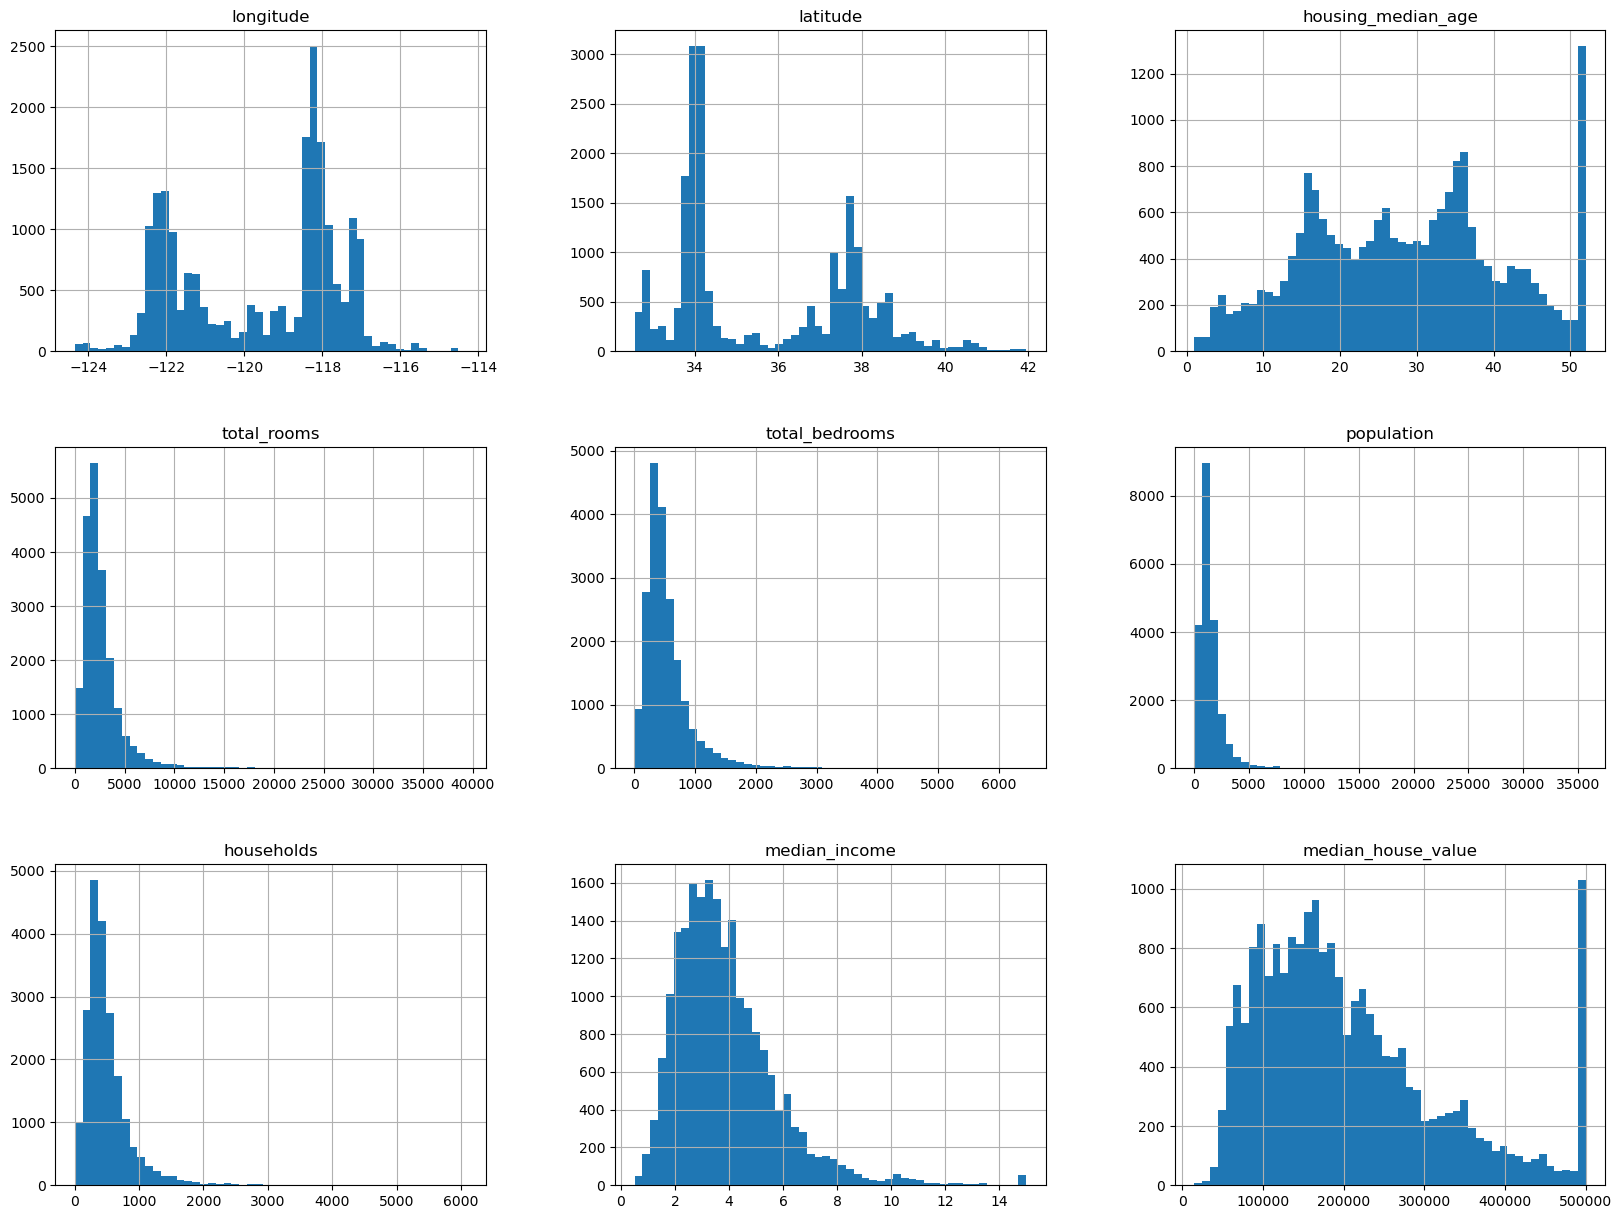

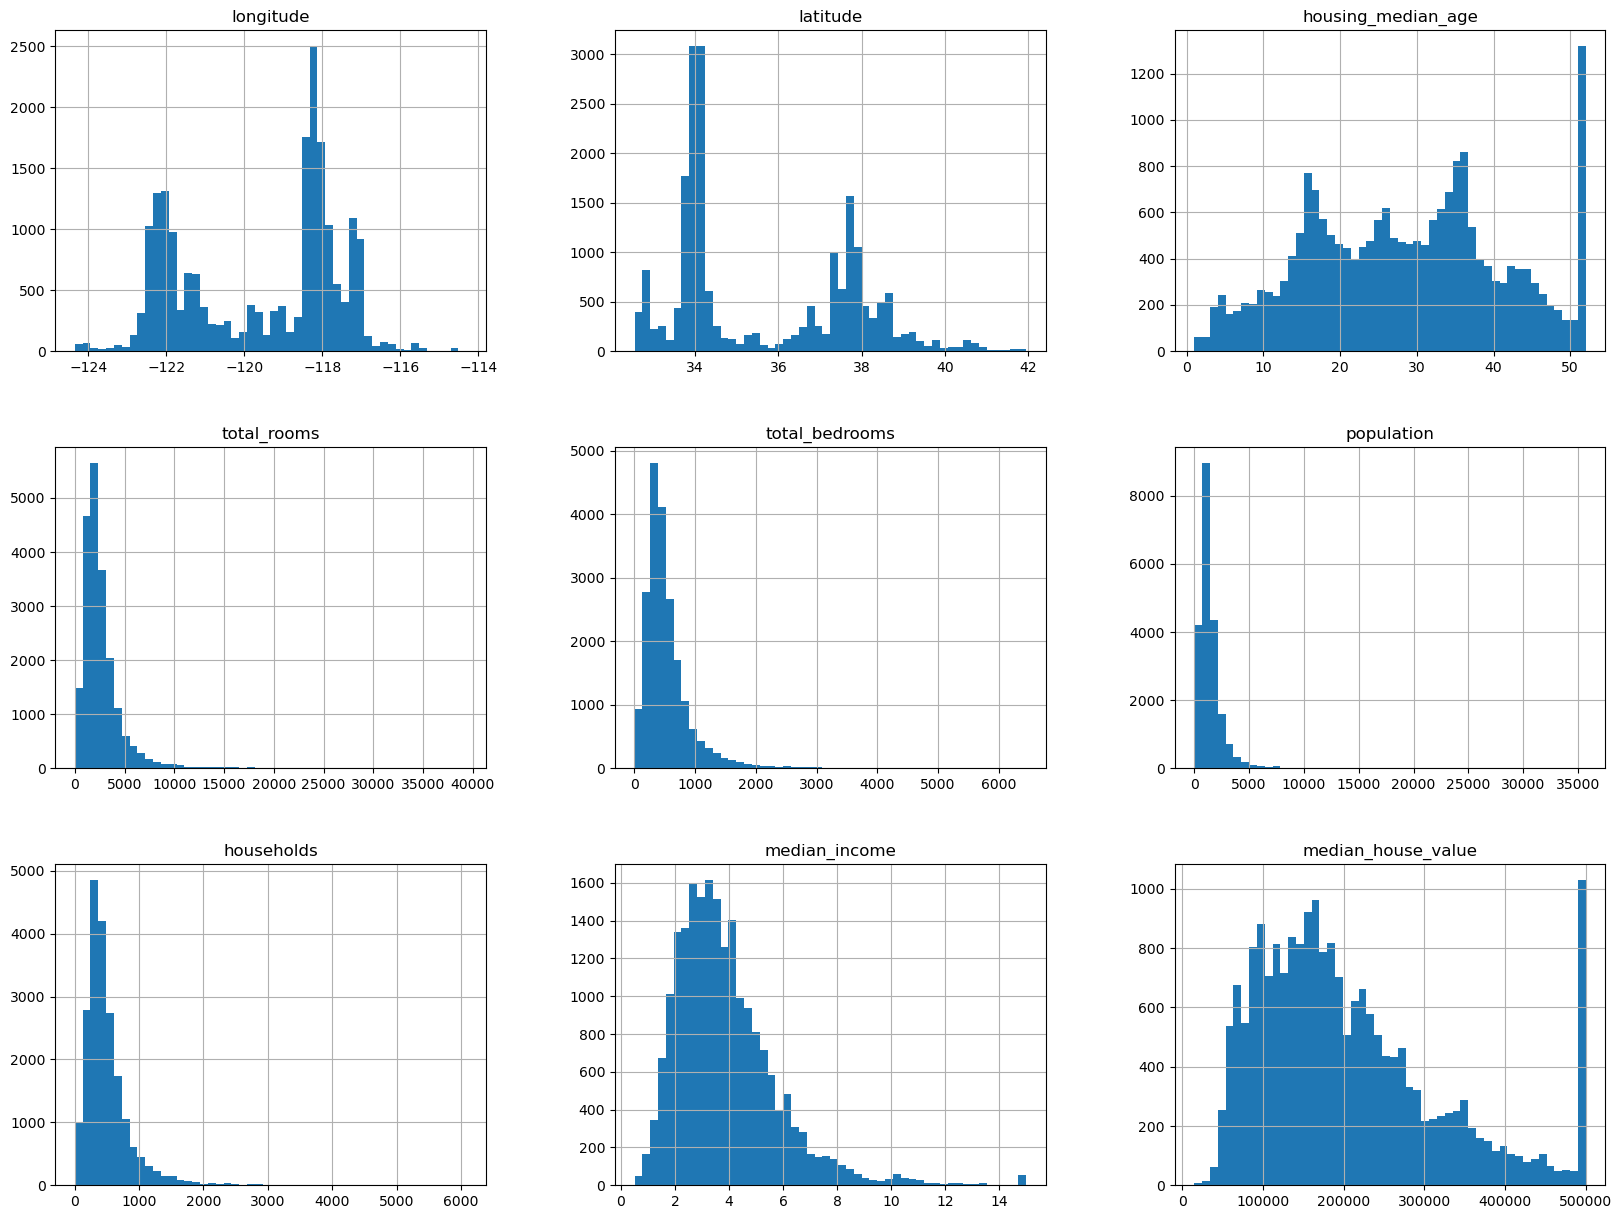

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
housing_df.hist(bins=50, figsize=(20,15))
plt.show()

## Create Test Set

Train/Test with Random Sampling

In [ ]:
# to make this notebook's output identical at every run
np.random.seed(42)

In [ ]:
import numpy as np

# For illustration only. Sklearn has train_test_split()
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [ ]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing_df, test_size=0.2, random_state=42)

Train/Test Split with Stratified Sampling

In [9]:
housing_df["income_cat"] = pd.cut(housing_df["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

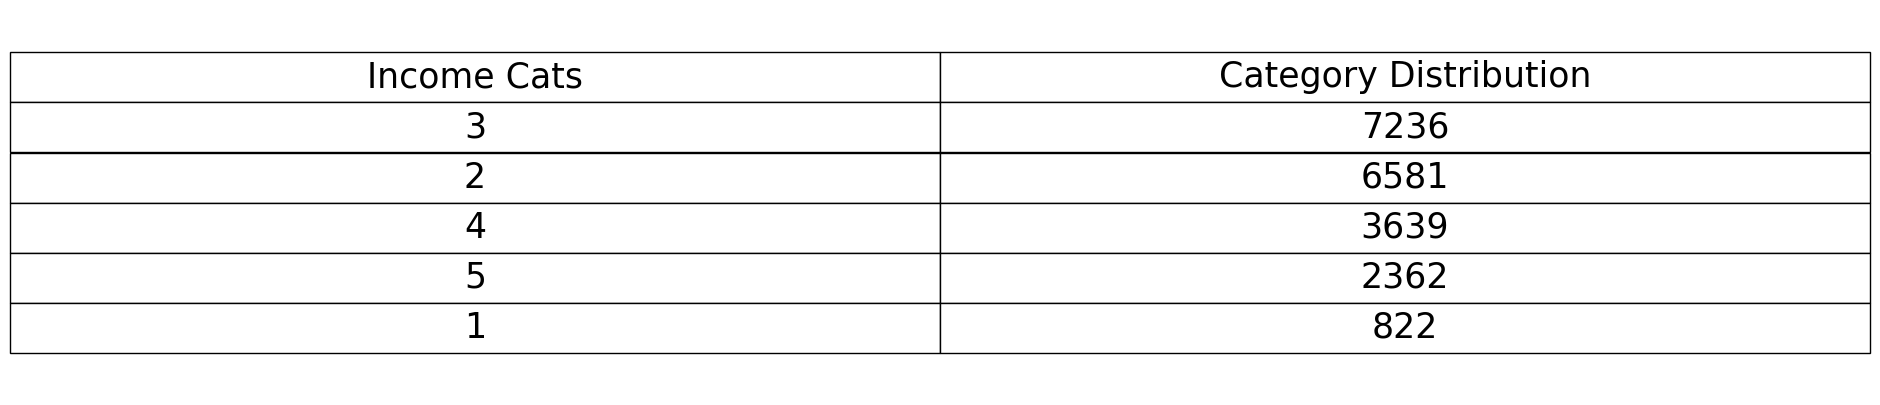

In [ ]:
housing_df['income_cat'].value_counts()
pdseries_to_eps(housing_df['income_cat'].value_counts() , "income_cat.eps")

In [ ]:
def df_to_eps(df , name , rowlabels = False):
  fig, ax = plt.subplots(figsize=(16, 6))  # adjust size
  ax.axis('off')
  tbl = ax.table(cellText=df.values,
                colLabels=df.columns,
                rowLabels=df.index if rowlabels else None,
                cellLoc='center',
                loc='center')

  tbl.auto_set_font_size(False)
  tbl.set_fontsize(25)
  tbl.scale(2, 5)

  #plt.subplots_adjust(left=0, right=1, top=1, bottom=0)

  # Save as EPS
  plt.savefig(name, format="eps", bbox_inches="tight" , pad_inches=0)

In [10]:
# Stratified Sampling split.
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing_df, housing_df["income_cat"]):
    strat_train_set = housing_df.loc[train_index]
    strat_test_set = housing_df.loc[test_index]

Comparison between the Random Sampling and Random Sampling

In [ ]:
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(housing_df, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(housing_df),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

In [ ]:
compare_props.round

,Overall,Stratified,Random,Rand. %error,Strat. %error
income_cat,,,,,
1,0.039826,0.039971,0.040213,0.973236,0.364964
2,0.318847,0.318798,0.324370,1.732260,-0.015195
3,0.350581,0.350533,0.358527,2.266446,-0.013820
4,0.176308,0.176357,0.167393,-5.056334,0.027480
5,0.114438,0.114341,0.109496,-4.318374,-0.084674


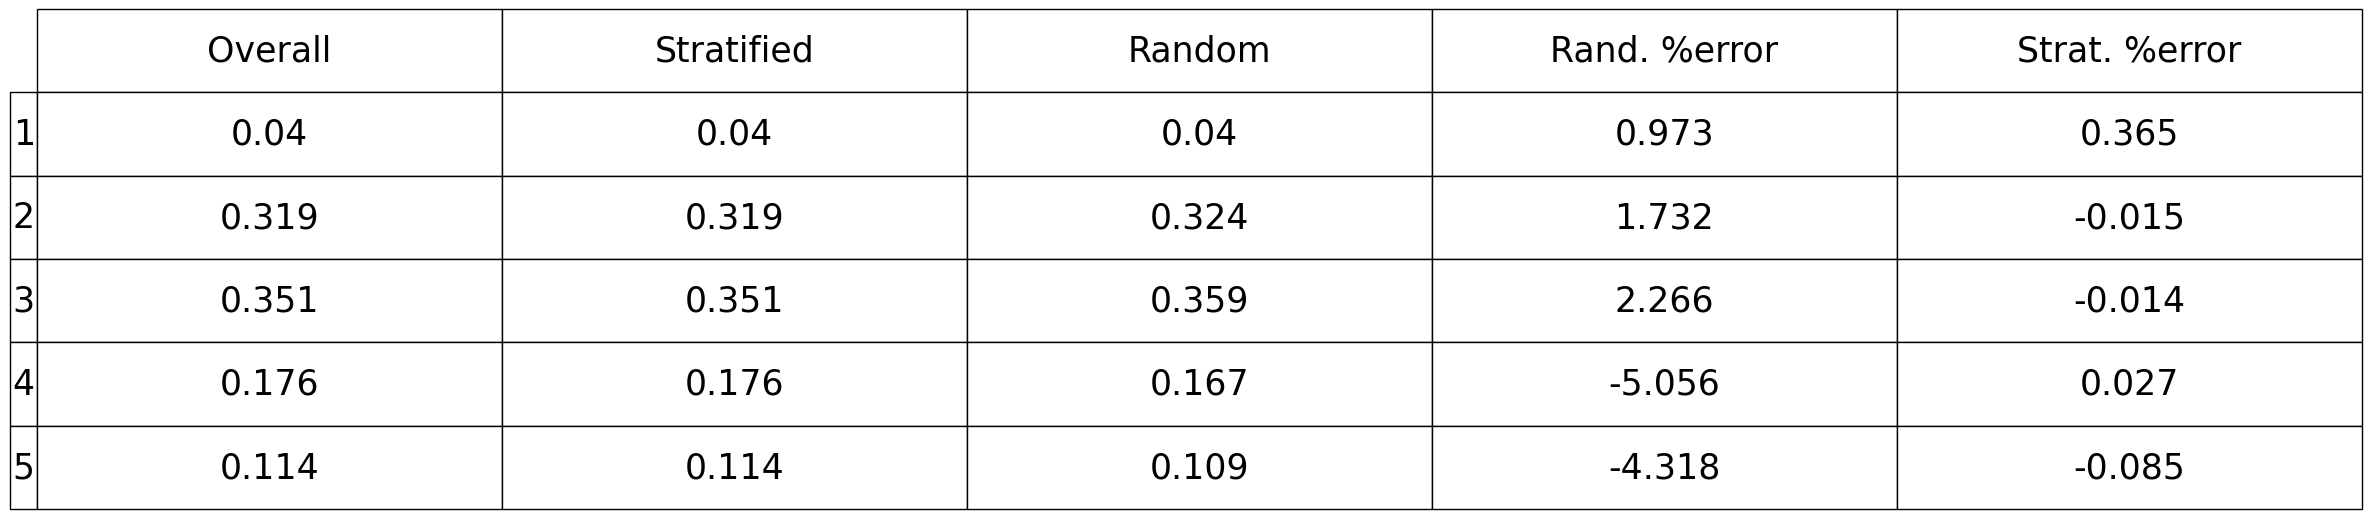

In [ ]:
df_to_eps(compare_props.round(3) , "overall_strata_comparison.eps" , rowlabels= True)

Scatterplot of different feature or feature-predictor pairing

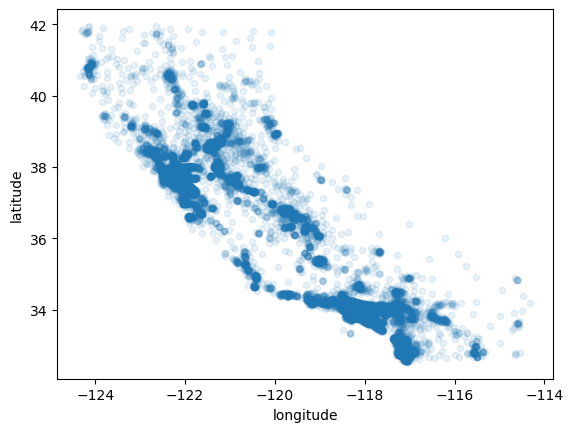

In [ ]:
housing_df.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)
plt.show()

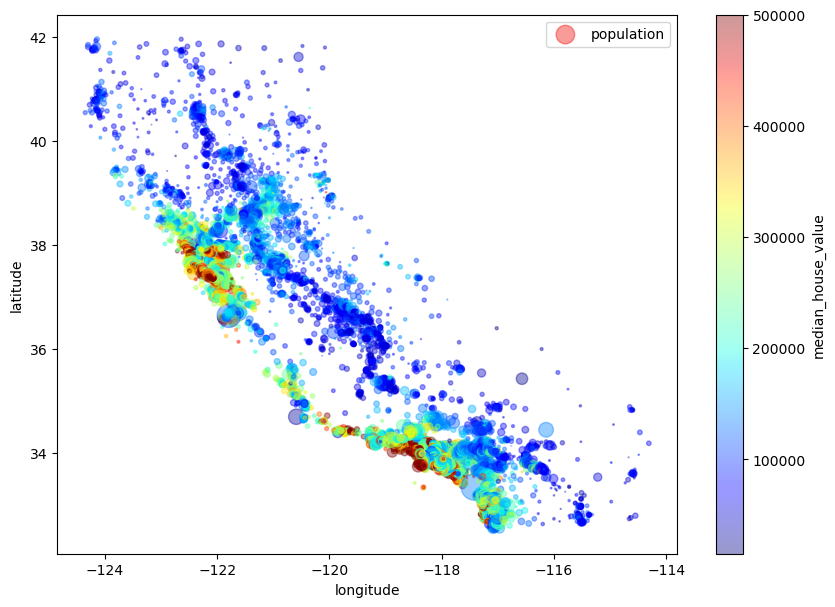

In [ ]:
housing_df.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
             s=housing_df["population"]/100, label="population", figsize=(10,7),
             c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
             sharex=False)
plt.legend()
plt.show()

## Correlation Analysis amongst the features and between the feature and predictor

In [ ]:
corr_matrix = housing_df.drop(['ocean_proximity' , 'income_cat'], axis = 1).corr().round(3)
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000,-0.925,-0.108,0.045,0.070,0.100,0.055,-0.015,-0.046
latitude,-0.925,1.000,0.011,-0.036,-0.067,-0.109,-0.071,-0.080,-0.144
housing_median_age,-0.108,0.011,1.000,-0.361,-0.320,-0.296,-0.303,-0.119,0.106
total_rooms,0.045,-0.036,-0.361,1.000,0.930,0.857,0.918,0.198,0.134
total_bedrooms,0.070,-0.067,-0.320,0.930,1.000,0.878,0.980,-0.008,0.050
population,0.100,-0.109,-0.296,0.857,0.878,1.000,0.907,0.005,-0.025
households,0.055,-0.071,-0.303,0.918,0.980,0.907,1.000,0.013,0.066
median_income,-0.015,-0.080,-0.119,0.198,-0.008,0.005,0.013,1.000,0.688
median_house_value,-0.046,-0.144,0.106,0.134,0.050,-0.025,0.066,0.688,1.000


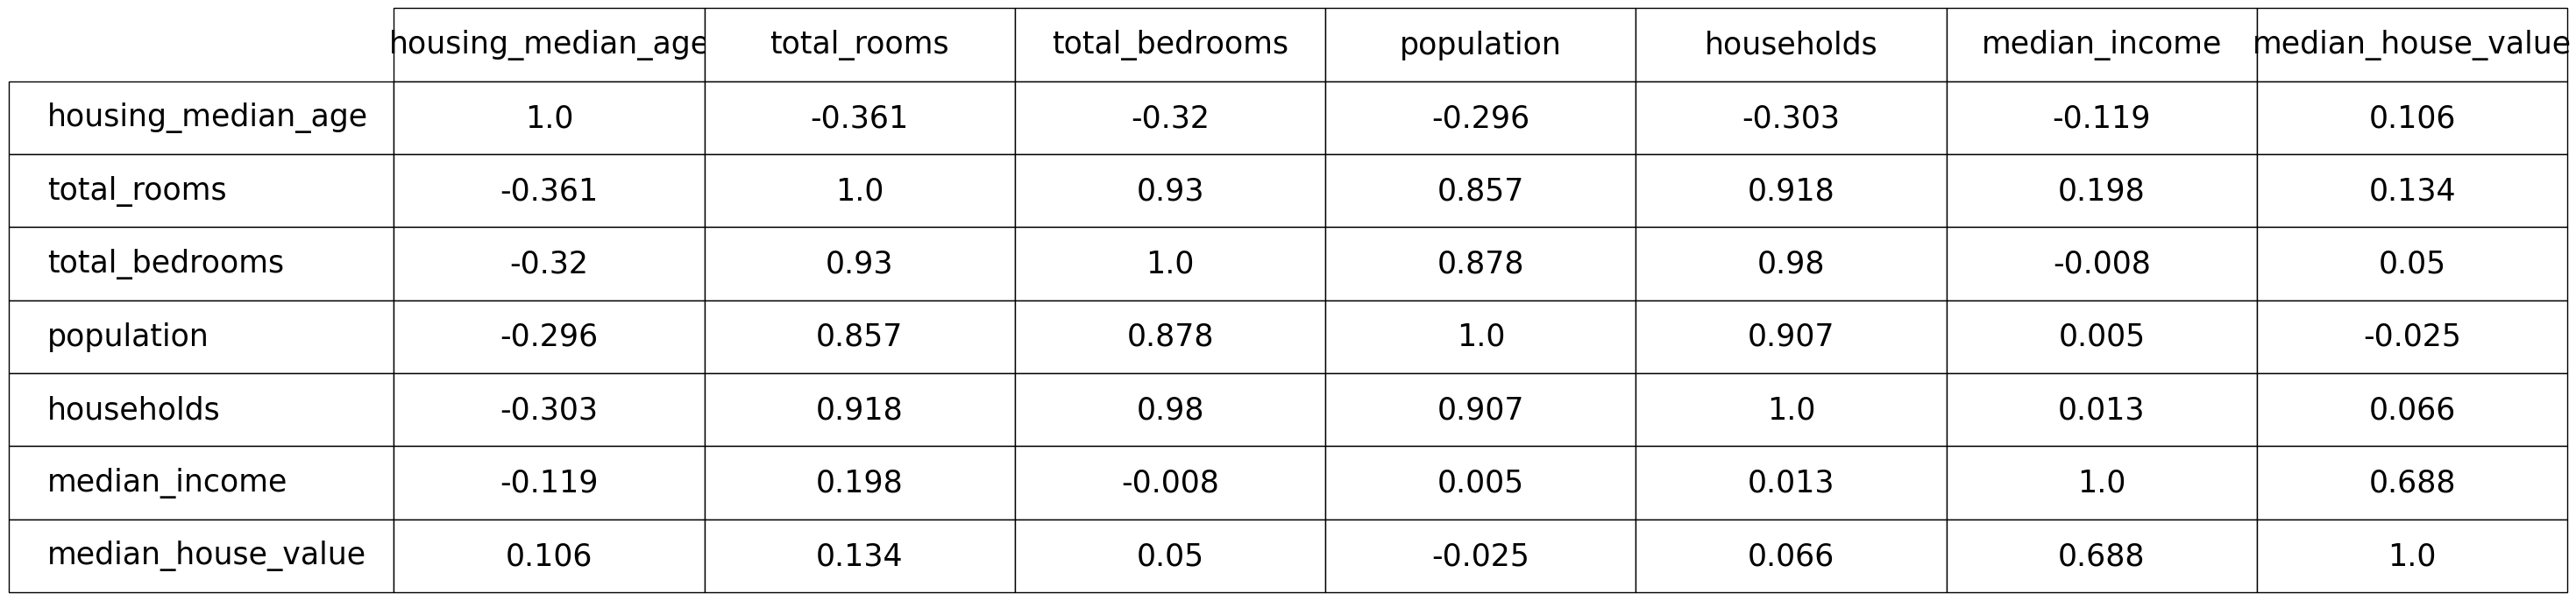

In [ ]:
df_to_eps(corr_matrix , "corr_matrix.eps", rowlabels=True)

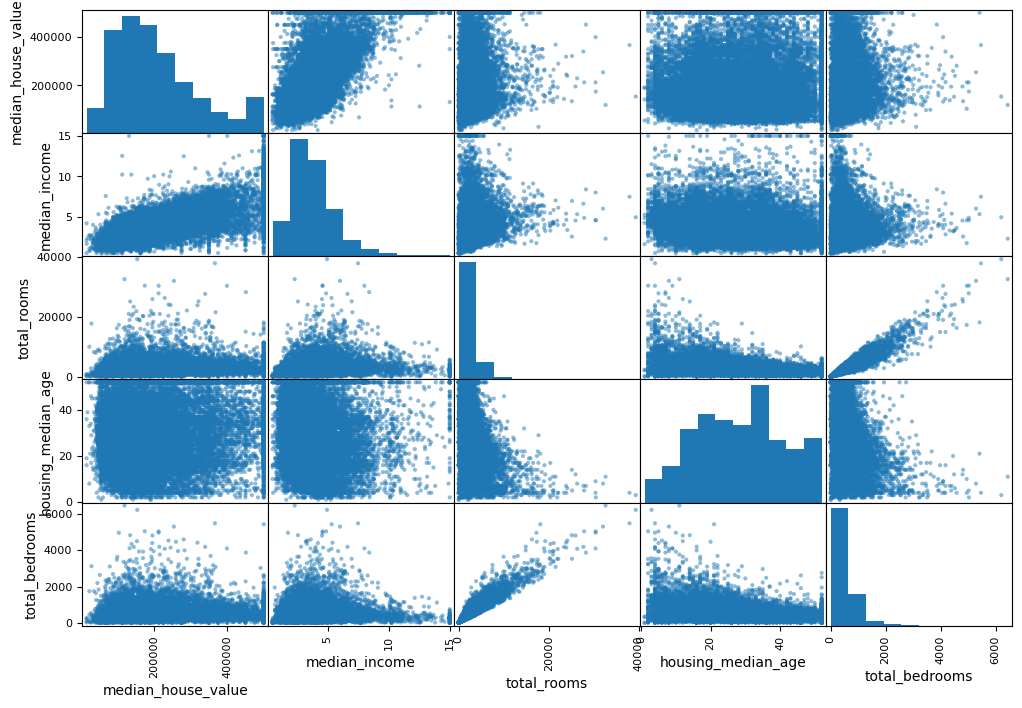

In [ ]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age" , 'total_bedrooms']
scatter_matrix(housing_df[attributes], figsize=(12, 8))
plt.show()

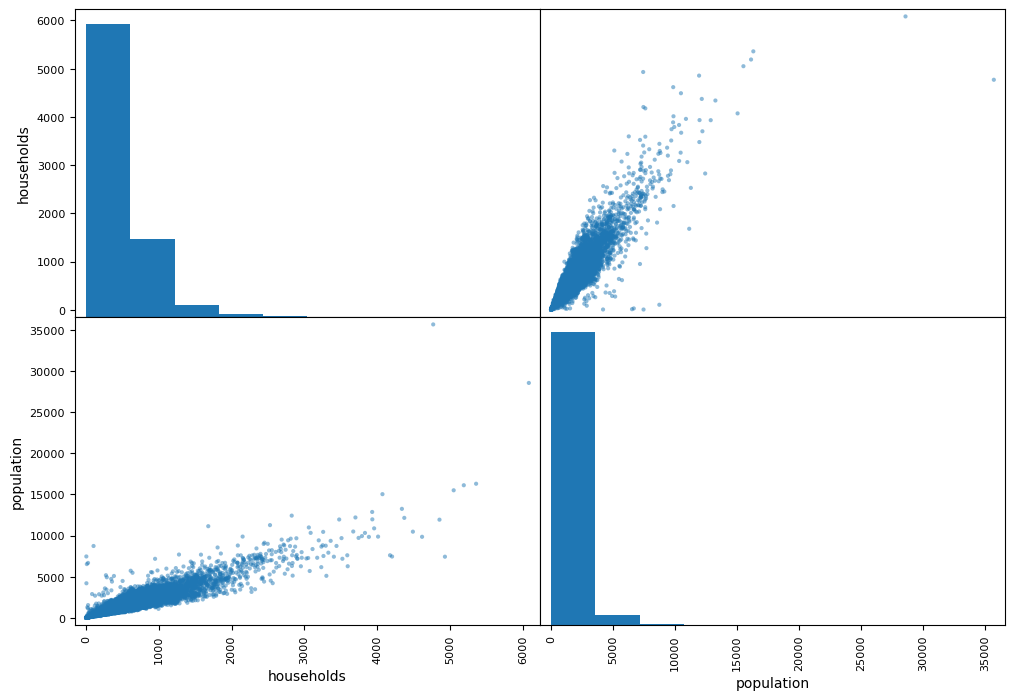

In [ ]:
attributes = ['households' , 'population' ]
scatter_matrix(housing_df[attributes], figsize=(12, 8))
plt.show()

In [ ]:
def pdseries_to_eps(series , name):

  fig, ax = plt.subplots(figsize=(12, 5))
  ax.axis('off')  # no axes

  # Convert Series to a 2D table: index + values
  tbl = ax.table(cellText=series.reset_index().values,
                colLabels=["Income Cats", "Category Distribution"],
                cellLoc='center',
                loc='center')

  tbl.auto_set_font_size(False)
  tbl.set_fontsize(25)
  tbl.scale(6, 6)

  # Save as EPS
  plt.savefig(name, format='eps', dpi=300, bbox_inches="tight")

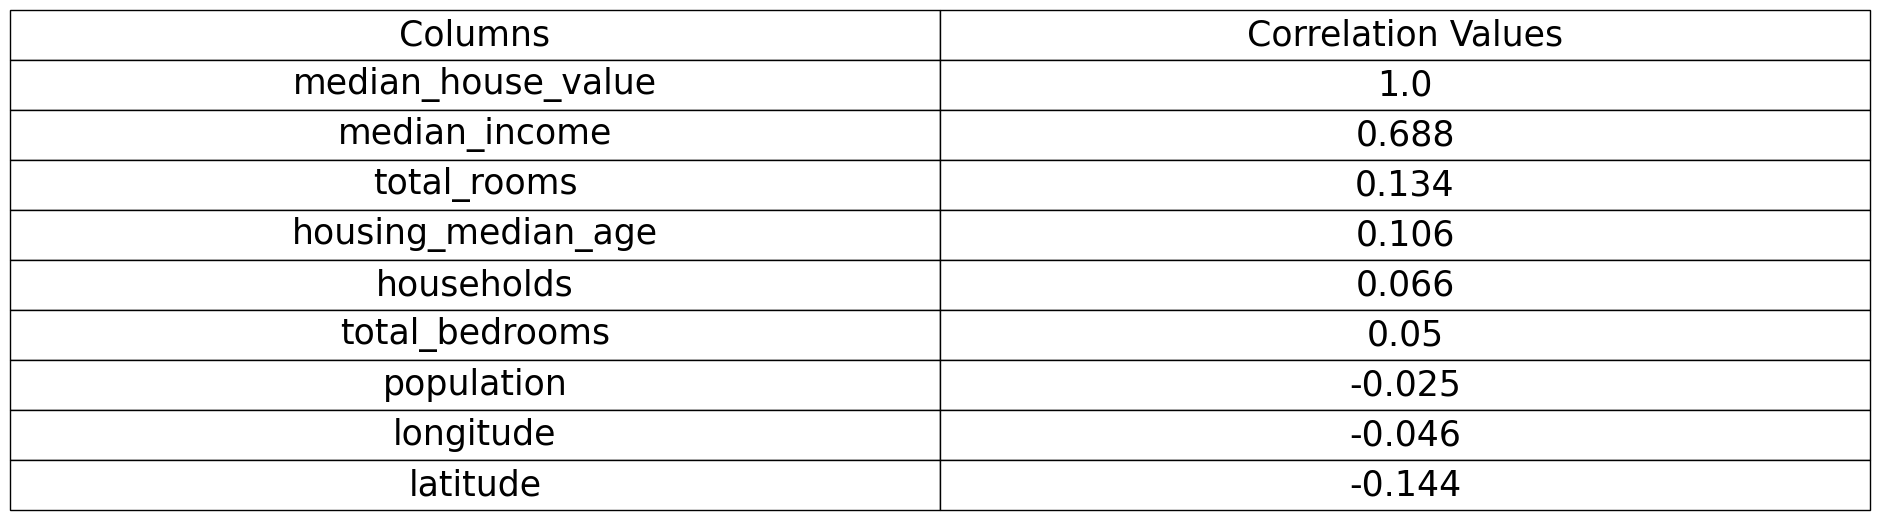

In [ ]:
corr_matrix["median_house_value"].sort_values(ascending=False)
pdseries_to_eps(corr_matrix["median_house_value"].sort_values(ascending=False) , "median_house_value_corr.eps")

In [ ]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   longitude                 20640 non-null  float64 
 1   latitude                  20640 non-null  float64 
 2   housing_median_age        20640 non-null  float64 
 3   total_rooms               20640 non-null  float64 
 4   total_bedrooms            20433 non-null  float64 
 5   population                20640 non-null  float64 
 6   households                20640 non-null  float64 
 7   median_income             20640 non-null  float64 
 8   median_house_value        20640 non-null  float64 
 9   ocean_proximity           20640 non-null  object  
 10  income_cat                20640 non-null  category
 11  rooms_per_household       20640 non-null  float64 
 12  bedrooms_per_room         20433 non-null  float64 
 13  population_per_household  20640 non-null  floa

## Preparing Data for Machine Learning

In [ ]:
housing = housing_df.copy()

In [ ]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   longitude           20640 non-null  float64 
 1   latitude            20640 non-null  float64 
 2   housing_median_age  20640 non-null  float64 
 3   total_rooms         20640 non-null  float64 
 4   total_bedrooms      20433 non-null  float64 
 5   population          20640 non-null  float64 
 6   households          20640 non-null  float64 
 7   median_income       20640 non-null  float64 
 8   median_house_value  20640 non-null  float64 
 9   ocean_proximity     20640 non-null  object  
 10  income_cat          20640 non-null  category
dtypes: category(1), float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
housing_df.drop('income_cat'  , axis = 1)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


##Prepare the Data for Machine Learning

In [11]:
housing = strat_train_set.drop(["median_house_value" , 'income_cat'], axis=1) # drop labels for training set
housing_labels = strat_train_set["median_house_value"].copy()

In [ ]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

In [12]:
housing_num = housing.drop('ocean_proximity', axis=1)

In [ ]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 12655 to 19773
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16354 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   ocean_proximity     16512 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


In [13]:
# column index

from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

##Creating the Cleaning and Transation Pipelines

In [14]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer


num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [ ]:
housing_num_tr.shape

(16512, 11)

In [15]:
## Combines the first pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

housing_prepared = full_pipeline.fit_transform(housing)

In [ ]:
housing_num_tr.shape

(16512, 11)

In [16]:
housing_prepared.shape

(16512, 16)

In [ ]:
housing_num_tr

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.01739526,
         0.00622264, -0.12112176],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.56925554,
        -0.04081077, -0.81086696],
       [ 0.26758118, -0.1259716 ,  1.22045984, ..., -0.01802432,
        -0.07537122, -0.33827252],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ..., -0.5092404 ,
        -0.03743619,  0.32286937],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.32814891,
        -0.05915604, -0.45702273],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.01407228,
         0.00657083, -0.12169672]])

In [ ]:
housing_labels

,median_house_value
12655,72100.0
15502,279600.0
2908,82700.0
14053,112500.0
20496,238300.0
...,...
15174,268500.0
12661,90400.0
19263,140400.0
19140,258100.0


##Building the Models

Logistic Regression Testing

In [17]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [18]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [ 85657.90192014 305492.60737488 152056.46122456 186095.70946094
 244550.67966089]


In [ ]:
some_labels

,median_house_value
12655,72100.0
15502,279600.0
2908,82700.0
14053,112500.0
20496,238300.0


Mean Squad Error

In [19]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

np.float64(68627.87390018745)

Decision Tree Model

In [21]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(random_state=42)

In [22]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

np.float64(0.0)

Cross Validation Testing with Decision Tree Model

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [ ]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [72831.45749112 69973.18438322 69528.56551415 72517.78229792
 69145.50006909 79094.74123727 68960.045444   73344.50225684
 69826.02473916 71077.09753998]
Mean: 71629.89009727491
Standard deviation: 2914.035468468928


In [ ]:
scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
pd.Series(np.sqrt(-scores)).describe()

,0
count,10.000000
mean,69104.079982
std,3036.132517
min,64114.991664
25%,67077.398482
50%,68718.763507
75%,71357.022543
max,73997.080502


RandomForest Model

In [ ]:
from sklearn.ensemble import RandomForestRegressor
random_reg = RandomForestRegressor(n_estimators=100, random_state=42)
random_reg.fit(housing_prepared , housing_labels)


RandomForestRegressor(random_state=42)

In [ ]:
housing_predictions = random_reg.predict(housing_prepared)
random_reg_mse = mean_squared_error(housing_labels, housing_predictions)
random_reg_rmse = np.sqrt(random_reg_mse)
random_reg_rmse

np.float64(18650.698705770003)

In [ ]:
scores = cross_val_score(random_reg, housing_prepared, housing_labels,
                         scoring="neg_mean_squared_error", cv=6)
tree_rmse_scores = np.sqrt(-scores)

In [ ]:
tree_rmse_scores.mean()

np.float64(50648.39858851348)

Support Vector Machine Regression Model

In [ ]:
from sklearn.svm import SVR
svr_reg = SVR(kernel='rbf', C=1.0)
svr_reg.fit(housing_prepared , housing_labels)


SVR()

In [ ]:
housing_predictions = svr_reg.predict(housing_prepared)
svr_reg_mse = mean_squared_error(housing_labels, housing_predictions)
svr_reg_rmse = np.sqrt(svr_reg_mse)
svr_reg_rmse

np.float64(118578.69234925653)

In [ ]:
scores = cross_val_score(svr_reg, housing_prepared, housing_labels,
                         scoring="neg_mean_squared_error", cv=6)
svr_rmse_scores = np.sqrt(-scores)

In [ ]:
svr_rmse_scores.mean()

np.float64(118620.83945227426)

##Hyperparameter Tuning for Random Forest

Using 5 folds hyperparameter tuning into

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [ ]:
np.sqrt(-grid_search.best_score_)

np.float64(49898.98913455217)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(housing_prepared, housing_labels)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7b4abada7500>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7b4abacb7920>},
                   random_state=42, scoring='neg_mean_squared_error')

In [ ]:
np.sqrt(-rnd_search.best_score_)

np.float64(49117.55344336652)

Custom testing of Model Selector Class(Ignore this)

In [ ]:
from random import randint


import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, KFold , RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from typing import Dict, List, Tuple, Any
import warnings
warnings.filterwarnings('ignore')

class MLModelComparator:
    """
    A comprehensive machine learning model comparison tool that evaluates
    multiple models using cross-validation and provides detailed performance metrics.
    """

    def __init__(self, cv_folds: int = 5, random_state: int = 42):
        """
        Initialize the model comparator.

        Args:
            cv_folds: Number of cross-validation folds
            random_state: Random state for reproducibility
        """
        self.cv_folds = cv_folds
        self.random_state = random_state
        self.results = {}
        self.hp_search_iterations = 40
        self.hp_cv_folds = 4

        # Define models to compare
        self.models = {
            'Linear Regression': {
                'model': LinearRegression(),
                'params': {}  # No hyperparameters to tune
            },
            #'Ridge Regression': Ridge(alpha=1.0, random_state=random_state),
            #'Lasso Regression': Lasso(alpha=1.0, random_state=random_state),
            'Decision Tree': {
                'model' : DecisionTreeRegressor(random_state=random_state),
                'params' : {

                      "max_depth": randint(3, 50),                 # explore depths between 3 and 50
                      "min_samples_split": randint(2, 20),         # min 2 up to 20
                      "min_samples_leaf": randint(1, 20),

                }
            },

            'Random Forest': {
                'model': RandomForestRegressor(random_state=random_state),
                'params': {
                    'n_estimators': [50, 100, 200],
                    'max_depth': [None, 5, 10, 15],
                    'min_samples_split': [2, 5, 10],
                    'min_samples_leaf': [ 2, 4, 6],
                    'max_features': ['sqrt', 'log2', None],
                    'bootstrap': [True, False]
                }
            },
            'Gradient Boosting': {
                'model': GradientBoostingRegressor(n_estimators= 100 , random_state=random_state),
                'params': {
                    'n_estimators': [50, 100, 200],
                    'learning_rate': [0.01, 0.15, 0.2],
                    'max_depth': [3, 5, 8],
                    'max_features': ['sqrt', 'log2', None]
                }
            },
            'SVM': {
                'model': SVR(kernel='rbf', C=1.0),
                'params': {
                    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                    'C': [0.001, 0.1, 1, 10, 100],
                    'epsilon': [0.001, 0.01, 0.1, 0.2],
                    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1]
                }
            },
            #'Neural Network
            #'Neural Network': MLPRegressor(hidden_layer_sizes=(100,), max_iter=500, random_state=random_state)
        }


    def tune_hyperparameters(self, model: Any, param_grid: Dict, X: np.ndarray, y: np.ndarray,
                           model_name: str) -> Tuple[Any, Dict]:
        """
        Perform hyperparameter tuning using RandomizedSearchCV.

        Args:
            model: The machine learning model
            param_grid: Dictionary of hyperparameters to tune
            X: Feature matrix
            y: Target vector
            model_name: Name of the model

        Returns:
            Tuple of (best_model, tuning_results)
        """
        if not param_grid:  # No hyperparameters to tune (e.g., Linear Regression)
            return model, {
                'best_params': {},
                'best_score': None,
                'tuning_time': 0,
                'total_fits': 0
            }

        print(f"  Tuning hyperparameters for {model_name}...")

        # Create RMSE scorer for hyperparameter tuning
        from sklearn.metrics import make_scorer
        rmse_scorer = make_scorer(lambda y_true, y_pred: -np.sqrt(mean_squared_error(y_true, y_pred)))

        # Set up RandomizedSearchCV
        random_search = RandomizedSearchCV(
            estimator=model,
            param_distributions=param_grid,
            n_iter=self.hp_search_iterations,
            cv=self.hp_cv_folds,
            scoring=rmse_scorer,
            random_state=self.random_state,
            n_jobs=-1,  # Use all available cores
            verbose=0
        )

        # Perform hyperparameter search
        import time
        start_time = time.time()
        random_search.fit(X, y)
        tuning_time = time.time() - start_time

        # Store tuning results
        tuning_results = {
            'best_params': random_search.best_params_,
            'best_score': -random_search.best_score_,  # Convert back to positive RMSE
            'tuning_time': round(tuning_time, 2),
            'total_fits': len(param_grid) * self.hp_cv_folds if isinstance(param_grid, dict) else self.hp_search_iterations * self.hp_cv_folds,
            'cv_results': random_search.cv_results_
        }

        print(f"    Best RMSE: {tuning_results['best_score']:.4f}")
        print(f"    Best params: {tuning_results['best_params']}")
        print(f"    Tuning time: {tuning_results['tuning_time']:.2f}s")

        return random_search.best_estimator_, tuning_results

    def add_custom_model(self, name: str, model: Any):
        """Add a custom model to the comparison."""
        self.models[name] = model

    def rmse_scorer(self, y_true: np.ndarray, y_pred: np.ndarray) -> float:
        """Calculate Root Mean Square Error."""
        return np.sqrt(mean_squared_error(y_true, y_pred))

    def detect_overfitting(self, train_scores: np.ndarray, val_scores: np.ndarray,
                          threshold: float = 5000) -> Dict[str, Any]:
        """
        Detect overfitting by comparing training and validation scores.

        Args:
            train_scores: Training scores across folds
            val_scores: Validation scores across folds
            threshold: Threshold for overfitting detection (relative difference)

        Returns:
            Dictionary with overfitting analysis
        """
        train_mean = np.mean(train_scores)
        val_mean = np.mean(val_scores)

        # Calculate relative difference
        relative_diff = abs(train_mean - val_mean)

        print('relative diff' , relative_diff)

        return {
            'is_overfitting': relative_diff > threshold,
            'train_mean': train_mean,
            'val_mean': val_mean,
            'relative_difference': relative_diff,
            'overfitting_severity': 'High' if relative_diff > 15000 else 'Medium' if relative_diff > 10000 else 'Low'
        }

    def cross_validate_model(self, model: Any, X: np.ndarray, y: np.ndarray,
                           model_name: str) -> Dict[str, Any]:
        """
        Perform cross-validation on a single model and return detailed metrics.

        Args:
            model: The machine learning model
            X: Feature matrix
            y: Target vector
            model_name: Name of the model

        Returns:
            Dictionary containing all performance metrics
        """
        kfold = KFold(n_splits=self.cv_folds, shuffle=True, random_state=self.random_state)

        # Store scores for each fold
        fold_results = []
        train_scores = []
        val_scores = []

        for fold, (train_idx, val_idx) in enumerate(kfold.split(X)):
            X_train, X_val = X[train_idx], X[val_idx]
            y_train, y_val = y[train_idx], y[val_idx]

            # Fit model
            model_copy = self._get_model_copy(model)
            model_copy.fit(X_train, y_train)

            # Predictions
            train_pred = model_copy.predict(X_train)
            val_pred = model_copy.predict(X_val)

            # Calculate RMSE
            train_rmse = self.rmse_scorer(y_train, train_pred)
            val_rmse = self.rmse_scorer(y_val, val_pred)

            train_scores.append(train_rmse)
            val_scores.append(val_rmse)

            fold_results.append({
                'fold': fold + 1,
                'train_rmse': train_rmse,
                'val_rmse': val_rmse,
                'train_size': len(y_train),
                'val_size': len(y_val)
            })

        # Convert to numpy arrays
        train_scores = np.array(train_scores)
        val_scores = np.array(val_scores)

        # Calculate statistics
        stats = {
            'mean_train_rmse': np.mean(train_scores),
            'std_train_rmse': np.std(train_scores),
            'mean_val_rmse': np.mean(val_scores),
            'std_val_rmse': np.std(val_scores),
            'min_val_rmse': np.min(val_scores),
            'max_val_rmse': np.max(val_scores)
        }

        # Overfitting analysis
        overfitting_analysis = self.detect_overfitting(train_scores, val_scores)

        return {
            'model_name': model_name,
            'fold_results': fold_results,
            'statistics': stats,
            'overfitting_analysis': overfitting_analysis,
            'cv_folds': self.cv_folds
        }



    def cross_validation_model(self , model , model_name ,  housing_prepared , housing_labels):

      def display_scores(scores):
          return {"mean_val_rmse" : scores.mean() ,
                  "std_val_rmse" : scores.std() ,
                  "min_val_rmse" : scores.min() ,
                  "max_val_rmse" : scores.max()
                 }

      model = self._get_model_copy(model)

      model.fit(housing_prepared, housing_labels)

      housing_predictions = model.predict(housing_prepared)
      model_mse = mean_squared_error(housing_labels, housing_predictions)
      model_rmse = np.sqrt(model_mse)


      scores = cross_val_score(model, housing_prepared, housing_labels,
                          scoring="neg_mean_squared_error", cv=self.cv_folds)
      tree_rmse_scores = np.sqrt(-scores)

      val_rmse = tree_rmse_scores.mean()


      relative_diff = abs(model_rmse - val_rmse)

      print('relative diff' , relative_diff)

      overfitting_result = {
            'is_overfitting': relative_diff > 5000,
            'train_mean': model_rmse,
            'val_mean': tree_rmse_scores,
            'relative_difference': relative_diff,
            'overfitting_severity': 'High' if relative_diff > 15000 else 'Medium' if relative_diff > 10000 else 'Low'
        }

      score_results = {
          "mean_train_rmse" : model_rmse ,
          "std_train_rmse" : None ,
          **display_scores(tree_rmse_scores)


      }

      return {
            'model_name': model_name,
            'fold_results': None,
            'statistics': score_results,
            'overfitting_analysis': overfitting_result,
            'cv_folds': self.cv_folds
        }


    def _get_model_copy(self, model):
        """Create a copy of the model to avoid fitting issues."""
        from sklearn.base import clone
        return clone(model)

    def run_comparison(self, X: np.ndarray, y: np.ndarray,
                      scale_features: bool = True , method ='manual') -> pd.DataFrame:
        """
        Run comparison across all models.

        Args:
            X: Feature matrix
            y: Target vector
            scale_features: Whether to scale features (recommended for some models)

        Returns:
            DataFrame with comprehensive results
        """
        print(f"Running {len(self.models)} models with {self.cv_folds}-fold cross-validation...")
        print("-" * 70)

        all_results = []

        if scale_features:
              X = full_pipeline.fit_transform(X)


        print('type' , type(X))

        y = y.values



        for model_name, model_config in self.models.items():
            print(f"Evaluating {model_name}...")

            pipeline = model_config['model']

            # Create pipeline with scaling if requested


            #pipeline , best_params = self.tune_hyperparameters(pipeline , model_config['params']  ,X, y, model_name)

            #print(f'Best params for {model_name}' , best_params)

            # Run cross-validation

            if method == 'manual':
                results = self.cross_validate_model(pipeline, X, y, model_name)
            else:
                results = self.cross_validation_model(pipeline, model_name, X, y)
            self.results[model_name] = results

            # Prepare summary for tabulation
            stats = results['statistics']
            overfitting = results['overfitting_analysis']

            all_results.append({
                'Model': model_name,
                'Mean_Val_RMSE': round(stats['mean_val_rmse'], 4),
                'Std_Val_RMSE': round(stats['std_val_rmse'], 4),
                'Mean_Train_RMSE': round(stats['mean_train_rmse'], 4),
                'Std_Train_RMSE': round(stats['std_train_rmse'], 4) if stats['std_train_rmse'] else None,
                'Min_Val_RMSE': round(stats['min_val_rmse'], 4) if stats['min_val_rmse'] else None,
                'Max_Val_RMSE': round(stats['max_val_rmse'], 4)if stats['max_val_rmse'] else None,
                'Overfitting': 'Yes' if overfitting['is_overfitting'] else 'No',
                'Overfitting_Severity': overfitting['overfitting_severity'],
                'Train_Val_Diff': round(overfitting['relative_difference'], 3)
            })


        # Create summary DataFrame
        results_df = pd.DataFrame(all_results)
        results_df = results_df.sort_values('Mean_Val_RMSE')

        return results_df

    def get_detailed_results(self, model_name: str) -> pd.DataFrame:
        """Get detailed fold-by-fold results for a specific model."""
        if model_name not in self.results:
            raise ValueError(f"Model {model_name} not found in results.")

        fold_data = self.results[model_name]['fold_results']
        return pd.DataFrame(fold_data)

    def plot_model_comparison(self, top_n: int = 5):
        """Plot comparison of top N models (requires matplotlib)."""
        try:
            import matplotlib.pyplot as plt

            # Get top N models by validation RMSE
            summary_df = self.get_summary_table()
            top_models = summary_df.head(top_n)

            fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

            # RMSE comparison
            x_pos = np.arange(len(top_models))
            ax1.bar(x_pos, top_models['Mean_Val_RMSE'], yerr=top_models['Std_Val_RMSE'],
                   capsize=5, alpha=0.7)
            ax1.set_xlabel('Models')
            ax1.set_ylabel('Validation RMSE')
            ax1.set_title('Model Performance Comparison (Lower is Better)')
            ax1.set_xticks(x_pos)
            ax1.set_xticklabels(top_models['Model'], rotation=45, ha='right')

            # Overfitting analysis
            overfitting_counts = summary_df['Overfitting'].value_counts()
            ax2.pie(overfitting_counts.values, labels=overfitting_counts.index, autopct='%1.1f%%')
            ax2.set_title('Overfitting Distribution Across All Models')

            plt.tight_layout()
            plt.show()

        except ImportError:
            print("Matplotlib not available. Install it to use plotting functionality.")

    def get_summary_table(self) -> pd.DataFrame:
        """Get the summary table of all results."""
        if not hasattr(self, '_summary_df'):
            raise ValueError("No results available. Run run_comparison() first.")
        return self._summary_df

# Example usage and demonstration
def create_sample_data():
    """Create sample dataset for demonstration."""
    np.random.seed(42)
    n_samples = 1000
    n_features = 10

    X = np.random.randn(n_samples, n_features)
    # Create a non-linear relationship
    y = (X[:, 0] ** 2 + X[:, 1] * X[:, 2] +
         0.5 * X[:, 3] + np.random.randn(n_samples) * 0.1)

    return X, y

# Demonstration

# Create sample data

# Initialize comparator
comparator = MLModelComparator(cv_folds=5, random_state=42)

# Run comparison
results_df = comparator.run_comparison(housing,  housing_labels, scale_features=True ,
                                       method='false')

print("\n" + "="*70)
print("MODEL COMPARISON RESULTS")
print("="*70)
print(results_df.to_string(index=False))

# Show detailed results for best model
best_model = results_df.iloc[0]['Model']
print(f"\n\nDetailed results for best model: {best_model}")
print("-" * 50)
detailed_df = comparator.get_detailed_results(best_model)
print(detailed_df.to_string(index=False))

# Store summary for later use
comparator._summary_df = results_df

Running 5 models with 5-fold cross-validation...
----------------------------------------------------------------------
type <class 'numpy.ndarray'>
Evaluating Linear Regression...
relative diff 0.006378119719436577
Evaluating Decision Tree...
relative diff 0
Evaluating Random Forest...
relative diff 1.715123460741519
Evaluating Gradient Boosting...
relative diff 0.054373964816477785
Evaluating SVM...
relative diff 0.00047751003139353

MODEL COMPARISON RESULTS
            Model  Mean_Val_RMSE  Std_Val_RMSE  Mean_Train_RMSE Std_Train_RMSE  Min_Val_RMSE  Max_Val_RMSE Overfitting Overfitting_Severity  Train_Val_Diff
    Random Forest     50638.9496      847.8904       18650.6987           None    49669.3766    51678.2928         Yes                 High           1.715
Gradient Boosting     53405.6323      583.1797       50651.5089           None    52683.2418    54196.5778          No                  Low           0.054
Linear Regression     69065.5907     1272.9446       68627.8739    

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'C': [100 , 120 , 140],
    'epsilon': [0.1 , 0.01 , 0.05],
    'kernel': ['linear'],
    'gamma': ['scale'],
    'degree': [2],       # Only used for 'poly' kernel
    'coef0': [0.0]   # Used for 'poly' and 'sigmoid'
}

# GridSearchCV setup
grid_search = GridSearchCV(
    svr_reg,
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_squared_error',  # Or 'r2', 'neg_mean_absolute_error', etc.
    n_jobs = 1
)

# Run grid search
grid_search.fit(housing_prepared, housing_labels)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Score (negative MSE):", grid_search.best_score_)

Best Parameters: {'C': 140, 'coef0': 0.0, 'degree': 2, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Best Score (negative MSE): -4994836779.398625


In [ ]:
np.sqrt(-grid_search.best_score_)

np.float64(70674.15920545942)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import expon, reciprocal

# see https://docs.scipy.org/doc/scipy/reference/stats.html
# for `expon()` and `reciprocal()` documentation and more probability distribution functions.

# Note: gamma is ignored when kernel is "linear"
param_distribs = {
        'kernel': ['linear', 'rbf'],
        'C': reciprocal(150000, 160000),
        'gamma': expon(scale=1.0),
    }

rnd_search = RandomizedSearchCV(svm_reg, param_distributions=param_distribs,
                                n_iter=50, cv=5, scoring='neg_mean_squared_error',
                                verbose=2, random_state=42 , n_jobs = 4)
rnd_search.fit(housing_prepared, housing_labels)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


KeyboardInterrupt: 

In [ ]:
rnd_search.best_params_

AttributeError: 'RandomizedSearchCV' object has no attribute 'best_params_'

In [ ]:
np.sqrt(-rnd_search.best_score_)

np.float64(55105.64063114777)

In [ ]:
full_pipeline_with_predictor = Pipeline([
        ("preparation", full_pipeline),
        ("random", SVR(kernel='rbf' , gamma = 0.2469 , C=157505))
    ])

full_pipeline_with_predictor.fit(housing, housing_labels)
full_pipeline_with_predictor.predict(some_data)

array([ 76116.55196773, 337655.99664775,  90226.53751863, 154089.0747116 ,
       224206.80639829])

In [ ]:
housing_labels

,median_house_value
12655,72100.0
15502,279600.0
2908,82700.0
14053,112500.0
20496,238300.0
...,...
15174,268500.0
12661,90400.0
19263,140400.0
19140,258100.0


In [ ]:
rnd_search.best_estimator_

RandomForestRegressor(max_features=7, n_estimators=180, random_state=42)

In [ ]:
final_model = SVR(kernel='rbf' , gamma = 0.2469 , C=157505)
final_model.fit(housing_prepared, housing_labels)

X_test = strat_test_set.drop(['income_cat' , "median_house_value"], axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)

final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [ ]:
housing_predictions = final_model.predict(housing_prepared)
svr_reg_mse = mean_squared_error(housing_labels, housing_predictions)
svr_reg_rmse = np.sqrt(svr_reg_mse)
svr_reg_rmse

np.float64(48869.57790068779)

In [ ]:
final_rmse

np.float64(52488.4513288874)

In [ ]:
import joblib

my_model = full_pipeline_with_predictor

joblib.dump(my_model, "my_model.pkl") # DIFF
#...
my_model_loaded = joblib.load("my_model.pkl")